In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
cop=pd.read_csv("C:/Capstone files/Copper_DataSet.csv")
cop.shape

(181673, 14)

In [3]:
cop.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
cop.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


### Handling the wrong format datatype

In [5]:
cop.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
#Note : errors='coerce' (tells pandas to force invalid parsing to NaT (Not a Time) for any date strings that cannot be converted to a valid date)
cop['item_date']=pd.to_datetime(cop['item_date'], format='%Y%m%d', errors='coerce').dt.date
cop['quantity tons']=pd.to_numeric(cop['quantity tons'], errors='coerce')
cop['delivery date']=pd.to_datetime(cop['delivery date'], format='%Y%m%d', errors='coerce').dt.date
#to clearing the unwanted zeros from the left side - '0000000000000000000000000000000000104991'
cop['material_ref']=cop['material_ref'].str.lstrip('0')

In [7]:
cop['customer']=pd.to_numeric(cop['customer'], errors='coerce')
cop['country']=pd.to_numeric(cop['country'], errors='coerce')
cop['product_ref']=pd.to_numeric(cop['product_ref'], errors='coerce')
cop['quantity tons']=pd.to_numeric(cop['quantity tons'], errors='coerce')
cop['selling_price']=pd.to_numeric(cop['selling_price'], errors='coerce')

In [8]:
cop['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [9]:
cop.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

### Handling Missing values

In [10]:
#Null values
cop.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [11]:
cop[cop['id'].isnull()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
26,NaN,2021-04-01,15.927990,30271717.0,28.0,To be approved,W,10.0,0.8,1000.0,NaN,611993,2021-07-01,1208.0
104566,NaN,2020-11-13,27.096376,30197989.0,27.0,Won,W,59.0,2.8,959.0,HRCL_DD 12 2.8X959,640665,2020-12-01,551.0


In [12]:
#Deleting the NaN rows of ID which contains only 2 out of lakhs of records
#converting the quantity tons object variable to float
#Handling the missing values in material_ref columns
#Handling the missing date's with farword fill method
#replace the missing value of thickness column with median value

cop=cop.dropna(subset=['id'], axis=0)
cop['quantity tons']=cop['quantity tons'].astype(float)
cop['material_ref']=cop['material_ref'].fillna('Not mentioned')
cop['item_date']=cop['item_date'].fillna(method='ffill')
cop['delivery date']=cop['delivery date'].fillna(method='ffill')
cop.fillna(value=cop['thickness'].median(), inplace=True)

In [58]:
#dropping the rest of missing values from all the rows which has less than 1% of whole dataset
cop=cop.dropna(axis=0)

In [13]:
cop.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [14]:
cop.shape

(181671, 14)

In [15]:
cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181671 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181671 non-null  object 
 2   quantity tons  181671 non-null  float64
 3   customer       181671 non-null  float64
 4   country        181671 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181671 non-null  object 
 7   application    181671 non-null  float64
 8   thickness      181671 non-null  float64
 9   width          181671 non-null  float64
 10  material_ref   181671 non-null  object 
 11  product_ref    181671 non-null  int64  
 12  delivery date  181671 non-null  object 
 13  selling_price  181671 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


### Exploratory Data Analysis(EDA)

In [16]:
def outlier(df, col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=col)
    plt.title(f'{col} outlier')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=col, kde=True, bins=50)
    plt.title(f'Distribution plot for {col}')

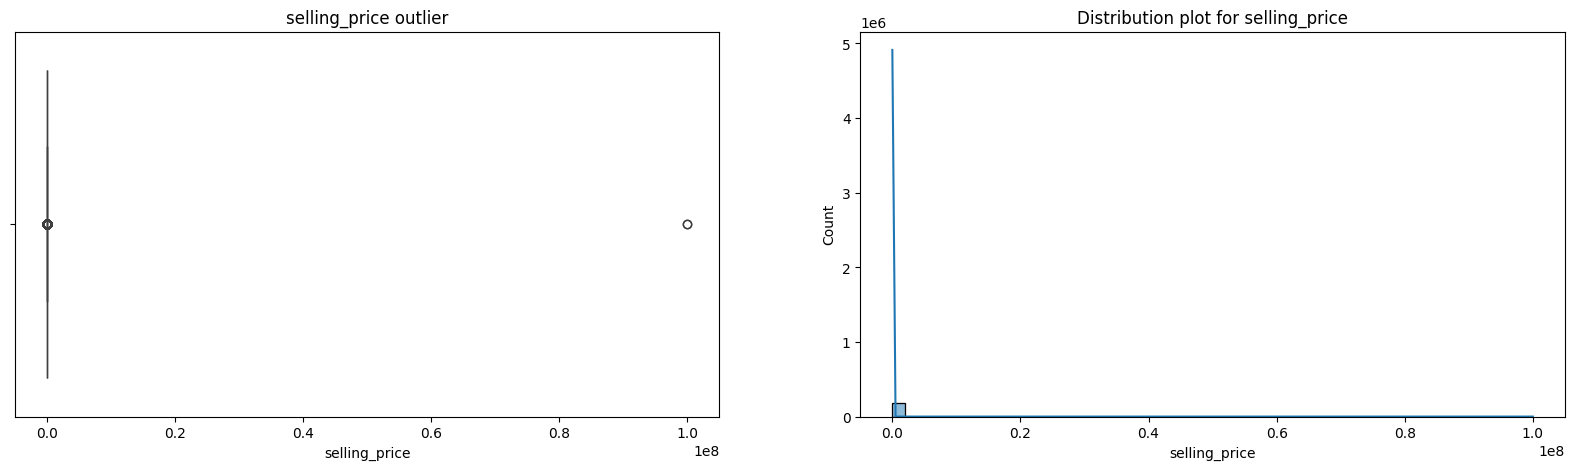

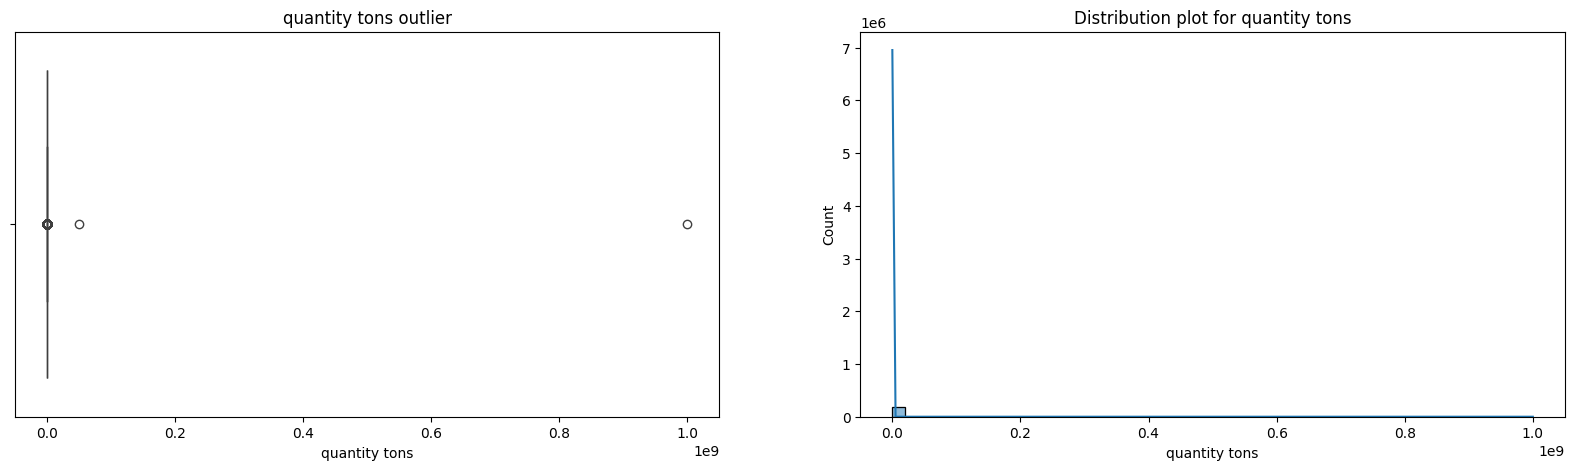

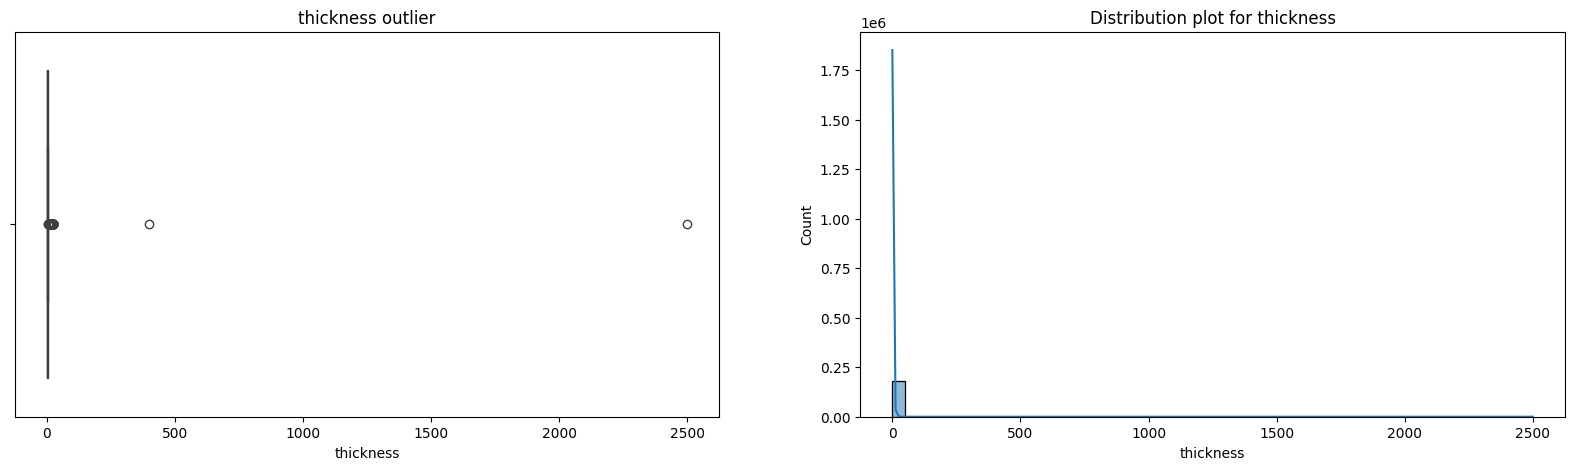

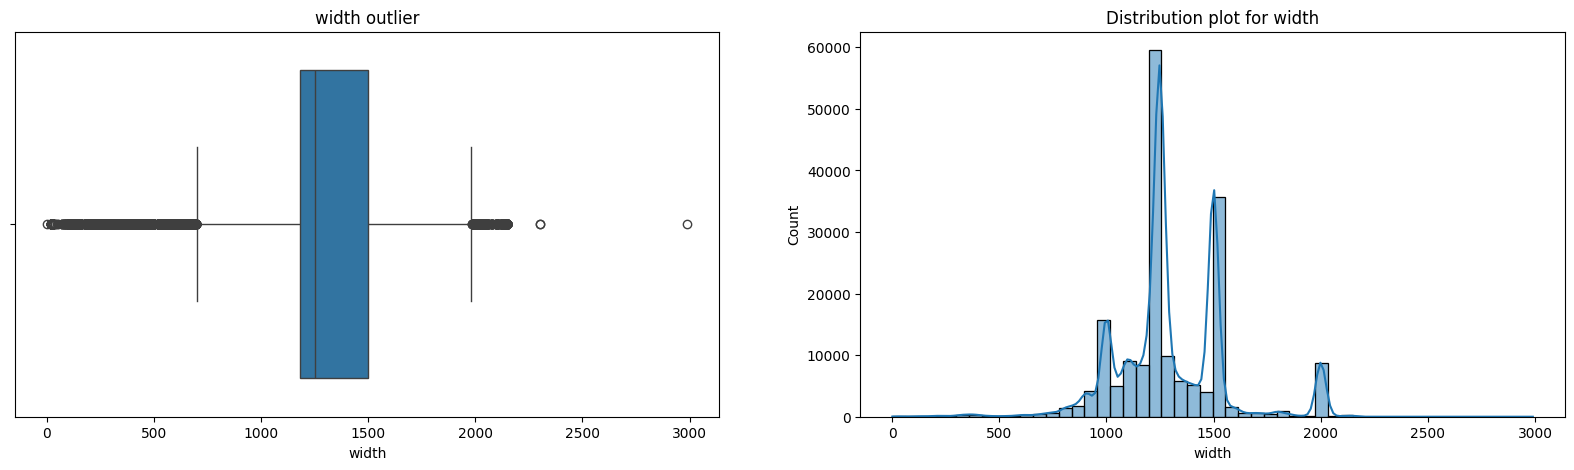

In [15]:
for i in ['selling_price', 'quantity tons', 'thickness', 'width']:
    outlier(cop, i)

In [17]:
cop1=cop.copy()
cop1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0


In [18]:
#Feature engineering(scaling down the data)
cop1['selling_price']=np.log(cop1['selling_price'])
cop1['quantity tons']=np.log(cop1['quantity tons'])
cop1['thickness']=np.log(cop1['thickness'])
cop1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684


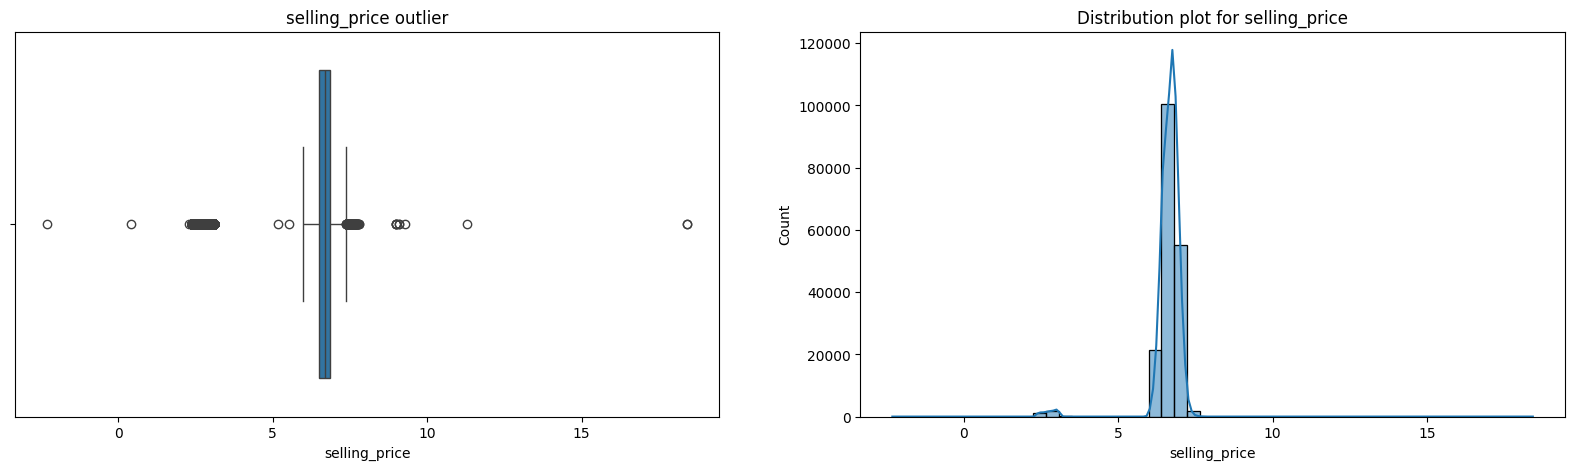

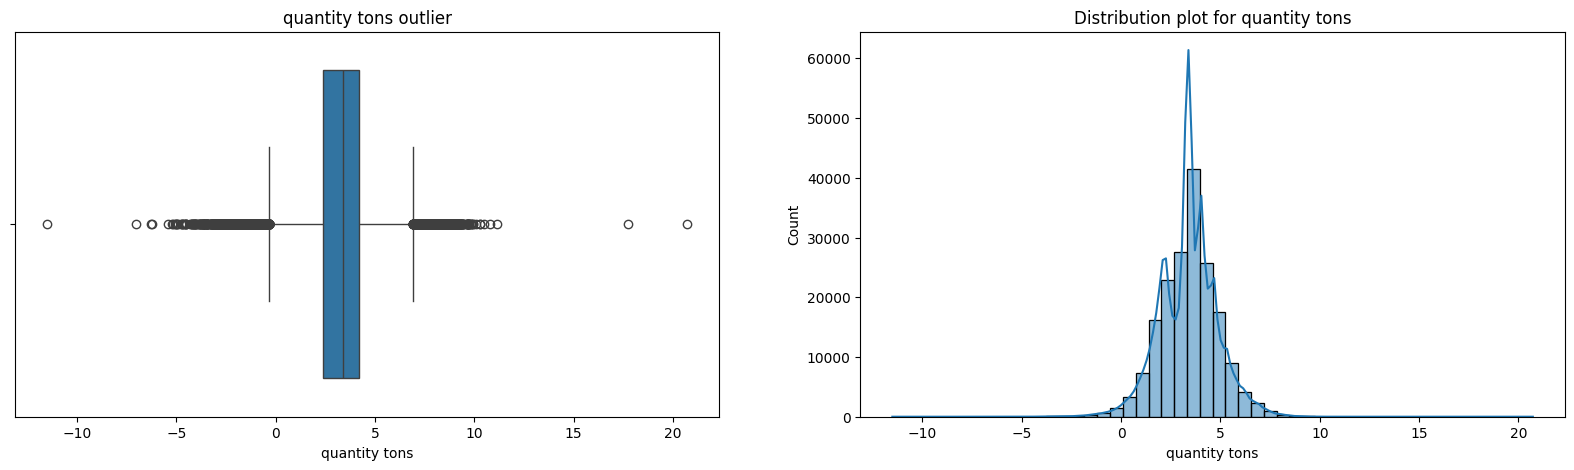

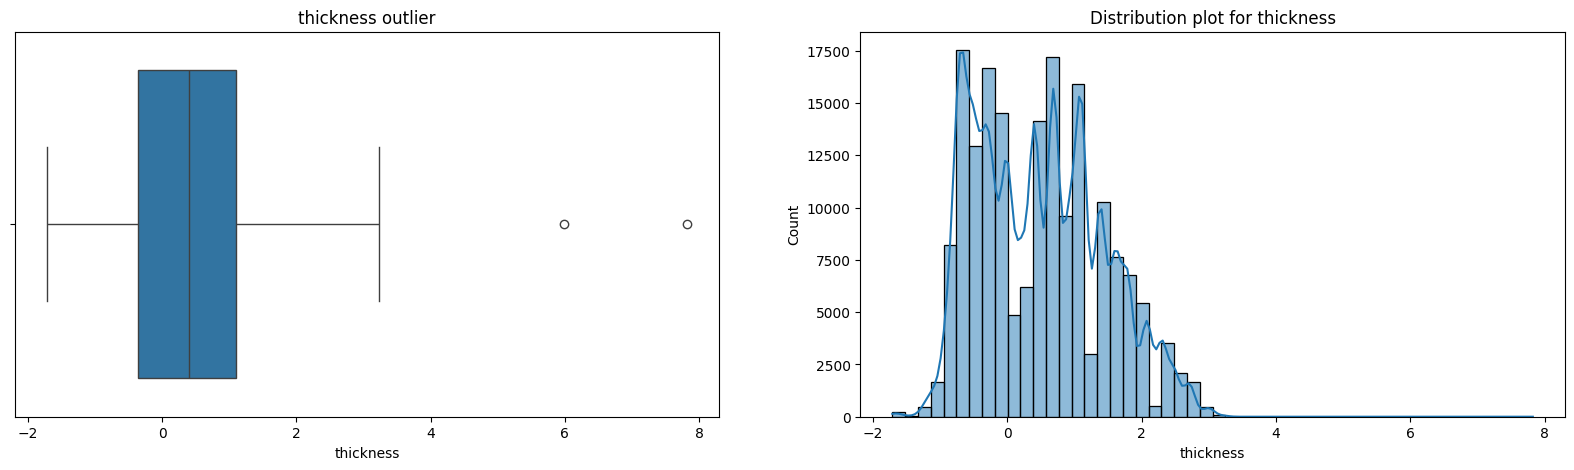

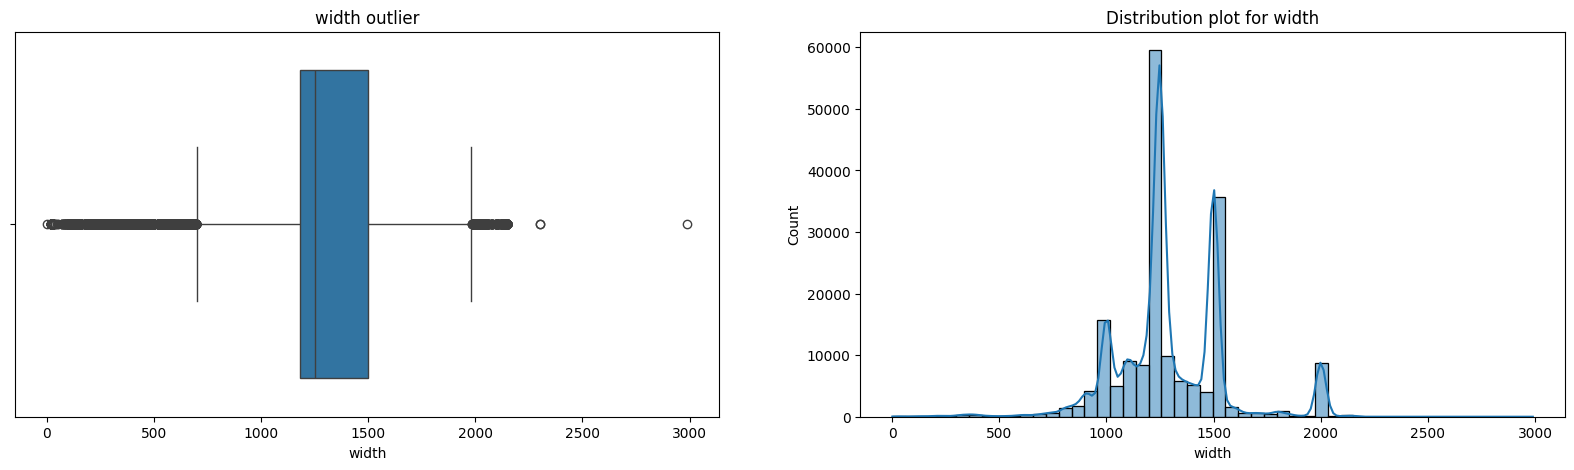

In [19]:
for i in ['selling_price', 'quantity tons', 'thickness', 'width']:
    outlier(cop1, i)

## Z-Score (Z = (X - M)/S.D)

In [45]:
#Z-Score
outliers=[]
def detect_outliers(df):
    threshold=3
    mean=np.mean(df)
    std=np.std(df)

    for i in df:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers      

In [22]:
out_values=detect_outliers(cop['selling_price'])
out_values

[100000941.0, 100001015.0]

In [24]:
out_values_q=detect_outliers(cop['quantity tons'])
out_values_q

[100000941.0, 100001015.0, 1000000000.0, 50000000.0]

In [25]:
out_values_t=detect_outliers(cop['thickness'])
out_values_t

[100000941.0,
 100001015.0,
 1000000000.0,
 50000000.0,
 2500.0,
 24.0,
 24.5,
 24.5,
 24.5,
 24.5,
 24.98,
 24.98,
 25.4,
 24.0,
 25.0,
 25.0,
 25.0,
 24.99,
 25.0,
 23.0,
 24.0,
 23.0,
 400.0,
 25.0,
 24.99,
 24.99,
 25.4,
 24.0,
 25.0,
 25.0,
 25.0,
 24.99,
 25.0,
 23.0,
 24.0,
 23.0,
 23.0,
 23.0,
 24.98,
 24.98,
 24.98,
 25.0,
 24.98,
 24.98,
 25.4,
 24.0,
 25.0,
 25.0,
 25.0,
 24.99,
 25.0,
 23.0,
 24.0,
 24.5,
 23.0,
 24.0,
 24.5,
 24.99,
 24.98,
 24.98,
 25.5,
 25.0,
 25.5,
 25.0]

In [ ]:
out_values=detect_outliers(cop['width'])
out_values

In [23]:
len(out_values)

2

### IQR with clip function (Capping)

In [20]:
#IQR and clip function(If the original element is less than the specified lower limit, it is replaced with the lower limit, same for the upper limit too )
def iqr(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    print(lower_bound, upper_bound)
    df[col]=df[col].clip(lower_bound, upper_bound)

### IQR (Trimming)

In [38]:
#removes the outlier but trimming function leads data loss
def iqr1(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    print(lower_bound, upper_bound)
    return lower_bound, upper_bound

In [39]:
lower_limit, upper_limit=iqr1(cop, 'selling_price')
new=cop[(cop['selling_price']>lower_limit) & (cop['selling_price']<upper_limit)]
new

243.0 1379.0


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00


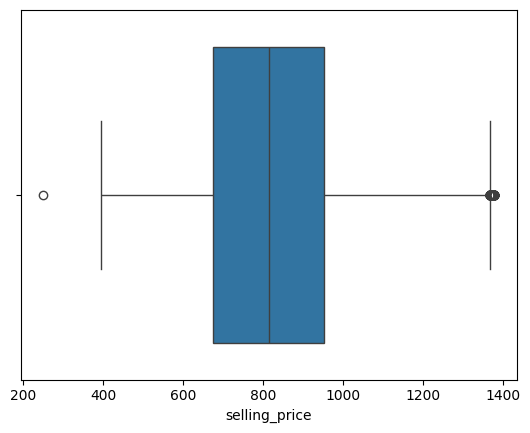

In [41]:
sns.boxplot(x=new['selling_price'])
plt.show()

In [42]:
#Outlier records
new_out=cop[(cop['selling_price']<lower_limit) | (cop['selling_price']>upper_limit)]
new_out

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.380,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.0
10,B85870F5-E1C7-4CAA-A7DA-355DC192B11D,2021-04-01,9.175770,30209509.0,30.0,Draft,W,41.0,0.380,1125.0,NBW_L+_1125_0.4,611993,2021-07-01,17.0
28,BEC18863-E965-478B-9861-A49A77F26655,2021-04-01,99.059199,30153510.0,30.0,Won,W,41.0,0.595,1207.0,GOO1208X595SP,611993,2021-04-01,-1160.0
41,77AE96A1-0FD6-4974-934D-2FA53C502087,2021-04-01,59.907355,30202938.0,25.0,Won,W,41.0,2500.000,1260.0,101952,1670798778,2021-04-01,0.0
102,DA3F694A-3DA1-4692-83A5-2F9A2E58FF02,2021-04-01,15.955136,30271717.0,28.0,To be approved,W,10.0,1.000,1000.0,Not mentioned,611993,2021-07-01,1386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180293,A747F328-06F3-4969-A481-DE99BD39191A,2020-07-02,1380.599637,30268656.0,79.0,Draft,S,15.0,2.000,1500.0,Not mentioned,164141591,2020-10-01,21.0
180297,DA7F25E1-1FB7-406B-A559-75EDD76F426B,2020-07-02,316.384839,30268656.0,79.0,Draft,S,15.0,1.500,1500.0,Not mentioned,164141591,2020-10-01,11.0
180301,FE28EFC1-0D90-43F3-A6B5-7B3F582859E9,2020-07-02,228.688858,30268656.0,79.0,Draft,S,15.0,2.000,1500.0,Not mentioned,164141591,2020-10-01,14.0
180305,EA8F675A-67EC-41F4-9C1C-2C94758F0855,2020-07-02,113.659397,30268656.0,79.0,Draft,S,15.0,3.000,1500.0,Not mentioned,164141591,2020-10-01,19.0


In [43]:
new_out.shape

(4878, 14)

In [44]:
cop.shape

(181671, 14)

In [21]:
iqr(cop1, 'quantity tons')
iqr(cop1, 'thickness')
iqr(cop1, 'width')
iqr(cop1, 'selling_price')
cop1

-0.3225795450940234 6.924905012037001
-2.5396057928489957 3.281543137578373
700.0 1980.0
5.9750377948392694 7.390361168943161


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,1000777,164141591,2020-07-01,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,1000227,164141591,2020-07-01,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,1004216,164141591,2020-07-01,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,1001149,164141591,2020-07-01,6.398595


In [22]:
cop1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    5
dtype: int64

In [23]:
cop1[cop1['selling_price'].isnull()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
28,BEC18863-E965-478B-9861-A49A77F26655,2021-04-01,4.595718,30153510.0,30.0,Won,W,41.0,-0.519194,1207.0,GOO1208X595SP,611993,2021-04-01,NaN
44761,947C725B-85ED-4817-B4F8-27720314F9E6,2021-02-04,4.619053,30198657.0,32.0,Won,W,41.0,0.223144,1100.0,Not mentioned,1721130331,2021-04-01,NaN
44810,35C64267-229F-438E-9A3B-91A6A41DACE2,2021-02-03,2.503556,30157111.0,78.0,Won,W,41.0,-0.287682,1250.0,Not mentioned,164141591,2021-04-01,NaN
44865,87F20C79-CE1E-4325-BBA8-1C6DE4657084,2021-02-03,3.345282,30217604.0,27.0,Not lost for AM,PL,10.0,0.405465,1270.0,BOB,164141591,2021-05-01,NaN
105189,8CA4D51F-DF96-4B88-805D-3937CCFDA810,2020-11-12,1.663978,30209814.0,25.0,Won,W,15.0,1.791759,1250.0,Not mentioned,1671863738,2021-02-01,NaN


In [24]:
cop1[cop1['quantity tons'].isnull()]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
105730,36820BDA-8CDF-49F3-89A2-C50A55B70CEB,2020-11-11,NaN,30203192.0,27.0,Won,S,15.0,0.405465,1500.0,Not mentioned,1332077137,2021-01-01,6.583409
131473,D03D83BD-3D05-40FB-A71E-6C33CCD06D97,2020-10-02,NaN,30199273.0,27.0,Draft,S,10.0,-0.510826,1220.0,111598,611993,2021-01-01,5.975038
181661,802C8D24-710A-4A96-B3B1-F33F383EC455,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.174353,1220.0,1000776,164141591,2020-07-01,6.380123
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,1001149,164141591,2020-07-01,6.398595


In [25]:
cop1=cop1.dropna(axis=0)

In [26]:
cop1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

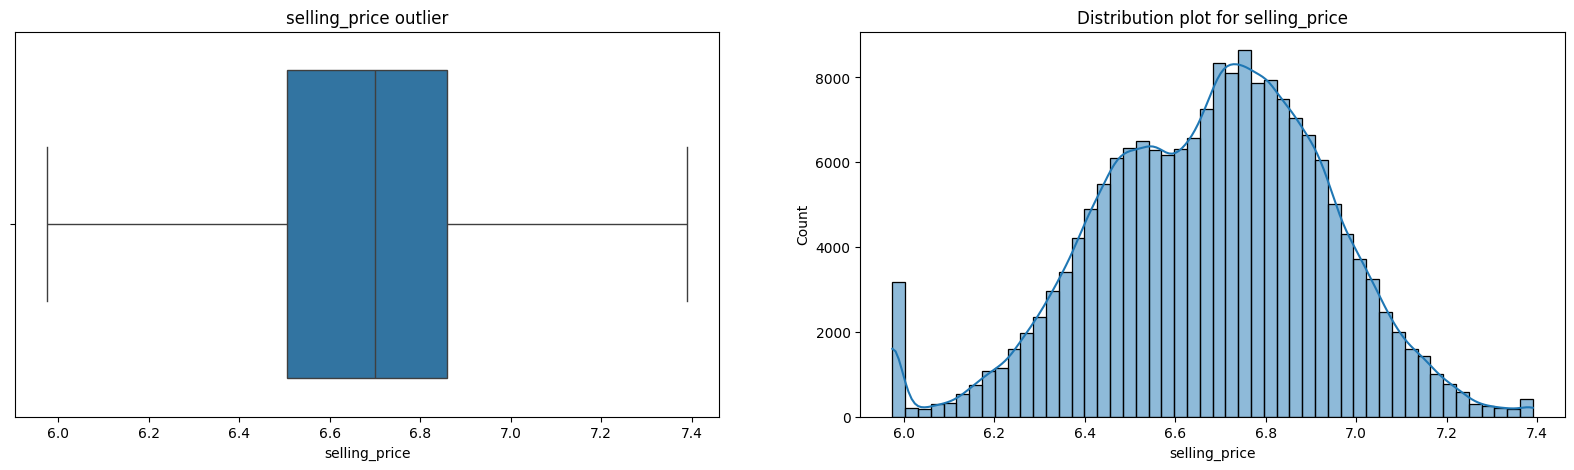

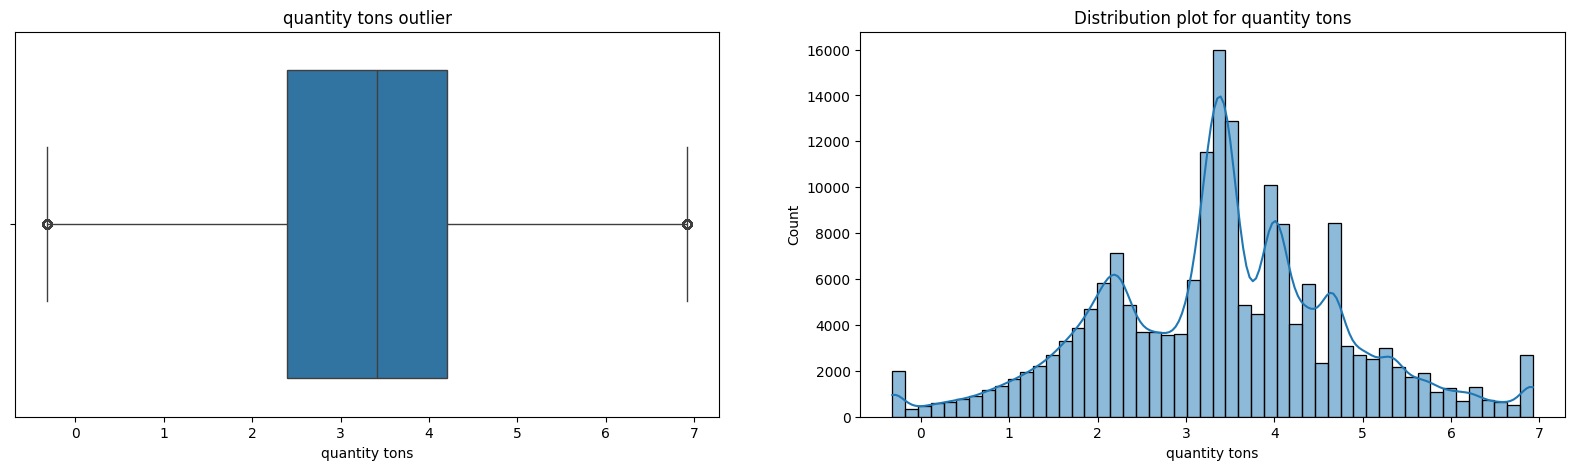

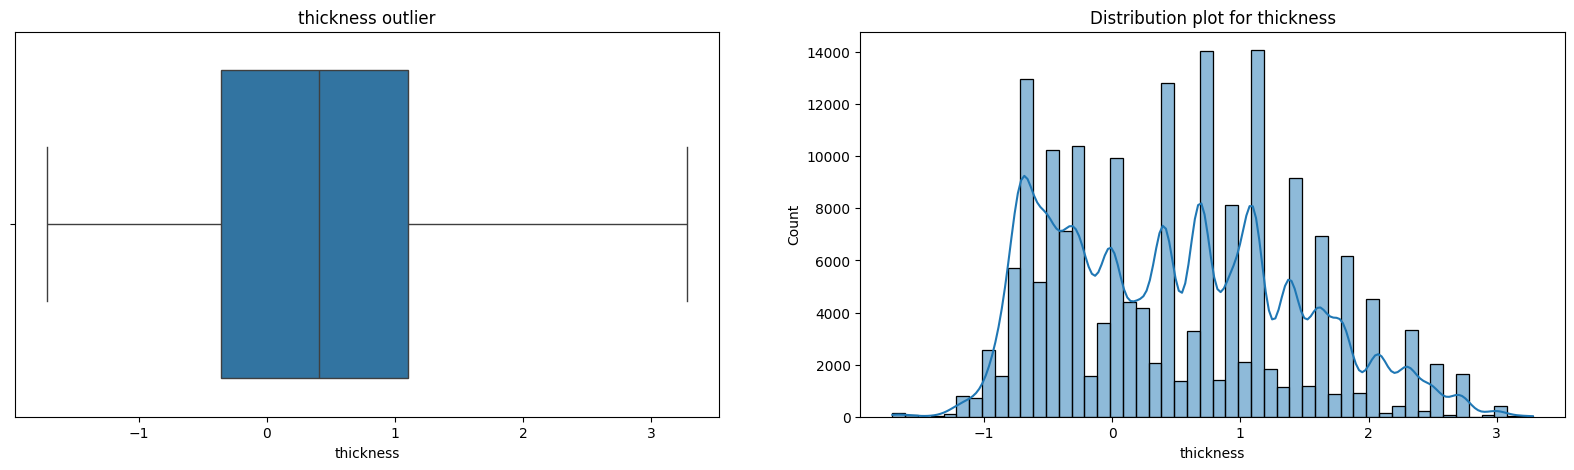

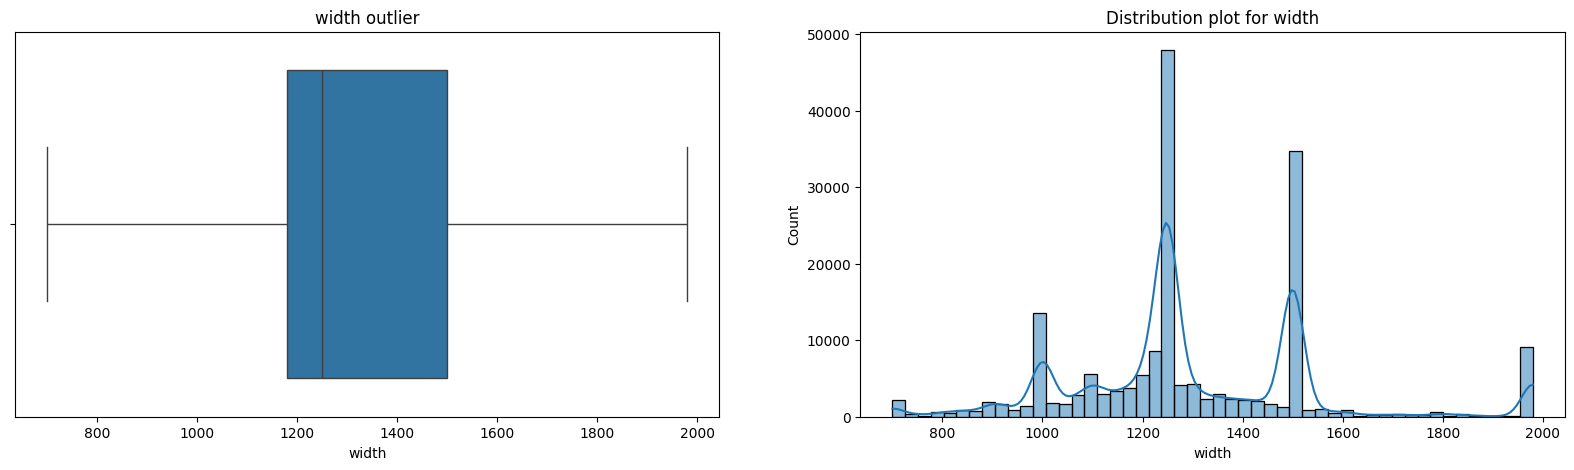

In [27]:
for i in ['selling_price', 'quantity tons', 'thickness', 'width']:
    outlier(cop1, i)

## Correlation Analysis

In [28]:
#Checking correlation to the numerical columns
correlation=['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']
corr_matrix=cop1[correlation].corr()
corr_matrix

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
quantity tons,1.000000,0.002550,-0.090695,0.066438,0.041226,0.032115,0.064674,-0.039048
customer,0.002550,1.000000,-0.020085,-0.015601,0.018854,0.009586,-0.007728,-0.025961
country,-0.090695,-0.020085,1.000000,-0.019035,-0.065612,0.053720,-0.147194,-0.019605
application,0.066438,-0.015601,-0.019035,1.000000,-0.197755,-0.198931,-0.131703,0.120128
thickness,0.041226,0.018854,-0.065612,-0.197755,1.000000,0.401393,0.234177,-0.421247
width,0.032115,0.009586,0.053720,-0.198931,0.401393,1.000000,-0.024116,-0.172864
product_ref,0.064674,-0.007728,-0.147194,-0.131703,0.234177,-0.024116,1.000000,-0.059441
selling_price,-0.039048,-0.025961,-0.019605,0.120128,-0.421247,-0.172864,-0.059441,1.000000


<Axes: >

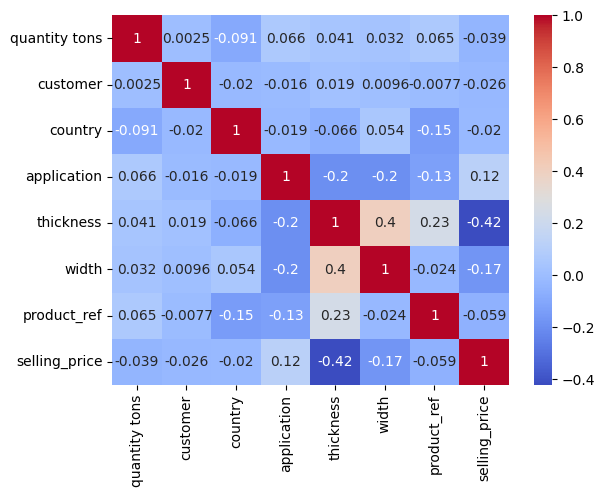

In [29]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Note: Seems there is no good corrleation between any features, highest of 0.40 have the width and thickness columns

## Data Visualization(Skewness)

In [30]:
from scipy.stats import skew, kurtosis

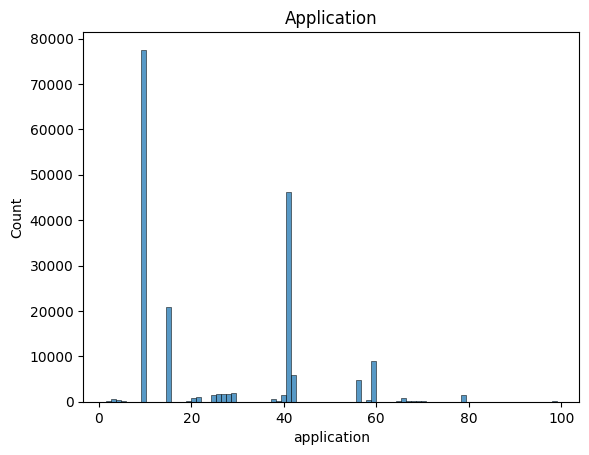

In [31]:
sns.histplot(x=cop1['application'])
plt.title('Application')
plt.show()

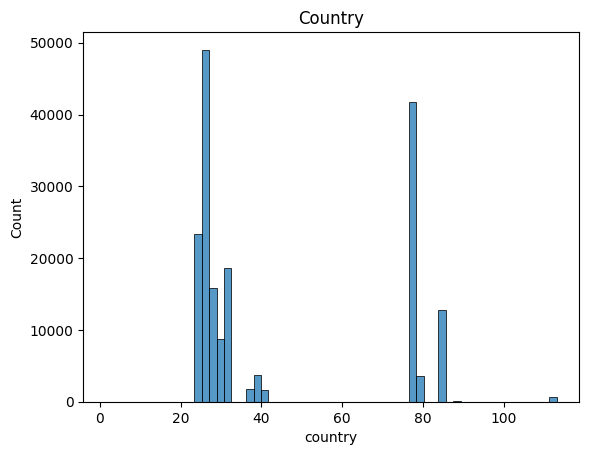

In [32]:
sns.histplot(x=cop1['country'])
plt.title('Country')
plt.show()

Kurtosis
###### D = 3 (Laplace distribution)
###### S = 2 (Hyperbolic secant distribution)
###### L = 1.2 (Logistic distribution)
###### N = 0 (Normal distribution)
###### C = -0.59376 ( Raised cosine distribution)
###### W = -1 (Wigner semicircle distribution)
###### U = -1.2 (Uniform distribution)

In [33]:
#Skewness
#to calculate how my date spreaded either left or right(left snew means negative right sknew means positive)
skewness=cop1.drop(columns=['id', 'item_date', 'status', 'item type', 'material_ref', 'delivery date'], axis=1).apply(skew)
kurtosis=cop1.drop(columns=['id', 'item_date', 'status', 'item type', 'material_ref', 'delivery date'], axis=1).apply(kurtosis)
print(f'Sknewness : \n{skewness}')
print('-------------------------------------')
print(f'Kurtosis : \n{kurtosis}')

Sknewness : 
quantity tons    -0.026513
customer         86.980836
country           0.752984
application       0.724382
thickness         0.348233
width             0.667615
product_ref       1.015206
selling_price    -0.272453
dtype: float64
-------------------------------------
Kurtosis : 
quantity tons       0.170131
customer         7563.863151
country            -1.274748
application        -0.545238
thickness          -0.737064
width               1.185592
product_ref        -0.921459
selling_price       0.050358
dtype: float64


Note : Quantity tones and selling price features are falls under normal distribution

In [34]:
cop1['status'].value_counts()

status
Won                116002
Lost                34438
Not lost for AM     19572
Revised              4276
To be approved       4169
Draft                3139
Offered                53
Offerable              10
1.5                     2
Wonderful               1
Name: count, dtype: int64

In [35]:
#removing the float category value from the status feature
cop1=cop1[cop1['status']!=1.5]

In [36]:
cop1['status'].value_counts()

status
Won                116002
Lost                34438
Not lost for AM     19572
Revised              4276
To be approved       4169
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [37]:
cop1['item type'].value_counts()

item type
W         105607
S          69232
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64

In [59]:
#clean copy dataset
dataset=cop1.to_csv('C:/Capstone files/Industrial_Copper_Modelling/Cleaned_dataset.csv')

## Machine Learning

## One hot encoding testing

In [ ]:
cop2=cop1.copy()
cop2.head(2)

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


X=cop2[['quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'product_ref']]
Y=cop2['selling_price']
#initiating the onehot encoding 1
encode_1=OneHotEncoder(handle_unknown='ignore')
encode_1.fit(X[['item type']])
X_e1=encode_1.fit_transform(X[['item type']]).toarray()
encode_2=OneHotEncoder(handle_unknown='ignore')
encode_2.fit(X[['status']])
X_e2=encode_2.fit_transform(X[['status']]).toarray()

X=np.concatenate((X[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref']].values, X_e1, X_e2), axis=1)
scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
reg=DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)
reg.fit(X_train, Y_train)

# evalution metrics
y_pred = reg.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 0.022707910750718388
R-squared: 0.6547846267197792


In [41]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

reg=DecisionTreeRegressor()
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

#gridsearchcv
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean squared error: 0.026163487068571075
R-squared: 0.602251477300559


## Encoding the categorical variable

In [41]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

cop1['item type']=encoder.fit_transform(cop1['item type'])
cop1['status']=encoder.fit_transform(cop1['status'])

In [42]:
cop1['item type'].value_counts()

item type
5    105607
3     69232
2      5659
1       610
6       524
0        27
4         1
Name: count, dtype: int64

In [43]:
cop1['status'].value_counts()

status
7    116002
1     34438
2     19572
5      4276
6      4169
0      3139
4        53
3        10
8         1
Name: count, dtype: int64

## Building Regression Model

In [44]:
X=cop1.drop(columns=['id', 'item_date', 'delivery date', 'material_ref', 'selling_price'], axis=1)
Y=cop1['selling_price']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(145328, 9)
(36332, 9)
(145328,)
(36332,)


In [42]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix

class RegressorModel():
    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train=X_train
        self.X_test=X_test
        self.Y_train=Y_train
        self.Y_test=Y_test

    def decisionTree(self):     
        from sklearn.tree import DecisionTreeRegressor
        reg=DecisionTreeRegressor()
        reg.fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'DecisionTree accuracy score of Train : {R2_train} and Test : {R2_test}')
    
    def randomForest(self):
        from sklearn.ensemble import RandomForestRegressor
        reg=RandomForestRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'RandomForest accuracy score of Train : {R2_train} and Test : {R2_test}')

    def gradientBoosting(self):
        from sklearn.ensemble import GradientBoostingRegressor
        reg=GradientBoostingRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'GradientBoosting accuracy score of Train : {R2_train} and Test : {R2_test}')

    def adaBoosting(self):
        from sklearn.ensemble import AdaBoostRegressor
        reg=AdaBoostRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'AdaBoostRegressor accuracy score of Train : {R2_train} and Test : {R2_test}')

    def extraTree(self):
        from sklearn.ensemble import ExtraTreesRegressor
        reg=ExtraTreesRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'ExtraTreesRegressor accuracy score of Train : {R2_train} and Test : {R2_test}')

In [104]:
model=RegressorModel(X_train, X_test, Y_train, Y_test)
accuracy_score={
    'DecisionTree': model.decisionTree(),
    'RandomForest': model.randomForest(),
    'GradientBoosting': model.gradientBoosting(),
    'AdaBoosting': model.adaBoosting(),
    'ExtraTree' : model.extraTree()
}

DecisionTree accuracy score of Train : 0.9976751955571839 and Test : 0.5112892203407072
RandomForest accuracy score of Train : 0.9576789434177374 and Test : 0.7115572559093388
GradientBoosting accuracy score of Train : 0.518120420420005 and Test : 0.5192855779853436
AdaBoostRegressor accuracy score of Train : 0.4081916525823178 and Test : 0.41298801393654483
ExtraTreesRegressor accuracy score of Train : 0.9976751955571839 and Test : 0.6570493570647226


## Normalizing/Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
#Initiating standard scaler
X_s=scaler.fit_transform(X)

In [35]:
#collecting the column names from X
cols=list(X.columns)
cols

['quantity tons',
 'customer',
 'country',
 'status',
 'item type',
 'application',
 'thickness',
 'width',
 'product_ref']

In [36]:
X_s=pd.DataFrame(data=X_s, columns=cols)
X_s.head(3)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,0.103688,-0.014619,-0.691842,0.70635,0.821587,-0.879340,-0.129818,0.815183,1.668013
1,2.130922,-0.012703,-0.814751,0.70635,0.821587,0.866645,-0.764500,-0.349669,1.665091
2,2.130922,-0.014715,-0.609903,0.70635,1.769249,0.134458,-0.986639,-1.385986,-0.659710


In [37]:
#Standard Scaler
X_train1, X_test1, Y_train, Y_test=train_test_split(X_s, Y, test_size=0.2, random_state=42)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train1.head()

(145335, 9)
(36334, 9)
(145335,)
(36334,)


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
13466,-0.410229,-0.006802,-0.527964,0.706350,0.821587,1.880442,1.218880,1.196772,-0.659693
5240,-0.001842,-0.014404,1.315668,0.706350,0.821587,-0.597729,0.134632,0.815183,-0.659693
7876,-0.930232,-0.014233,-0.609903,-1.940304,0.821587,-0.879340,-0.658720,0.453677,-0.659710
125795,2.125850,-0.012770,-0.773782,0.706350,0.821587,0.134458,-0.642853,-0.180967,-0.659710
11796,-0.281090,-0.004698,-0.200207,0.706350,-1.073738,-0.597729,0.927984,-0.189000,-0.659693


In [57]:
#Scaler Model
model1=RegressorModel(X_train1, X_test1, Y_train, Y_test)
accuracy_score={
    'DecisionTree': model1.decisionTree(),
    'RandomForest': model1.randomForest(),
    'GradientBoosting': model1.gradientBoosting(),
    'AdaBoosting': model1.adaBoosting(),
    'ExtraTree' : model1.extraTree()}

DecisionTree accuracy score of Train : 0.9851154544177213 and Test : 0.5351317550284329
RandomForest accuracy score of Train : 0.9481330033146915 and Test : 0.712184364644227
GradientBoosting accuracy score of Train : 0.5333943560058101 and Test : 0.5348377386851882
AdaBoostRegressor accuracy score of Train : 0.4457646835570368 and Test : 0.44879177726267416
ExtraTreesRegressor accuracy score of Train : 0.9851132823683661 and Test : 0.6578678428004316


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler_m=MinMaxScaler()

#Initiating MimMax Scaler
X_m=scaler_m.fit_transform(X)
X_m=pd.DataFrame(data=X_m, columns=cols)

In [39]:
#MinMax Scaler
X_train2, X_test2, Y_train, Y_test=train_test_split(X_m, Y, test_size=0.2, random_state=42)
print(X_train2.shape)
print(X_test2.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train2.head()

(145335, 9)
(36334, 9)
(145335,)
(36334,)


,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
13466,0.457380,0.014131,0.273543,0.875,0.833333,0.589744,0.696970,0.699219,0.000017
5240,0.544584,0.014045,0.677130,0.875,0.833333,0.138462,0.370016,0.625000,0.000017
7876,0.346342,0.014047,0.255605,0.000,0.833333,0.087179,0.130781,0.554688,0.000010
125795,0.998917,0.014064,0.219731,0.875,0.833333,0.271795,0.135566,0.431250,0.000010
11796,0.484955,0.014155,0.345291,0.875,0.500000,0.138462,0.609250,0.429688,0.000017


In [61]:
#MinMax Model
model2=RegressorModel(X_train2, X_test2, Y_train, Y_test)
accuracy_score={
    'DecisionTree': model2.decisionTree(),
    'RandomForest': model2.randomForest(),
    'GradientBoosting': model2.gradientBoosting(),
    'AdaBoosting': model2.adaBoosting(),
    'ExtraTree' : model2.extraTree()}

DecisionTree accuracy score of Train : 0.9851154544177213 and Test : 0.5363906552215909
RandomForest accuracy score of Train : 0.9480414672905216 and Test : 0.712474209235431
GradientBoosting accuracy score of Train : 0.5333943560058101 and Test : 0.5348377386851881
AdaBoostRegressor accuracy score of Train : 0.4551084494075899 and Test : 0.457557455574791
ExtraTreesRegressor accuracy score of Train : 0.9851137279641171 and Test : 0.6579587989762796


##### Accuracy scores(Without Scaling)
###### DecisionTree accuracy score of Train : 0.9851154544177213 and Test : 0.5364470095960441
###### RandomForest accuracy score of Train : 0.948159032791722 and Test : 0.7125564886254215
###### GradientBoosting accuracy score of Train : 0.5333943560058099 and Test : 0.534837738685188
###### AdaBoostRegressor accuracy score of Train : 0.4483716350856207 and Test : 0.4510491306969573
###### ExtraTreesRegressor accuracy score of Train : 0.9851134790282121 and Test : 0.6579776202241312

##### Standard scaler
###### DecisionTree accuracy score of Train : 0.9851154544177213 and Test : 0.5351317550284329
###### RandomForest accuracy score of Train : 0.9481330033146915 and Test : 0.712184364644227
###### GradientBoosting accuracy score of Train : 0.5333943560058101 and Test : 0.5348377386851882
###### AdaBoostRegressor accuracy score of Train : 0.4457646835570368 and Test : 0.44879177726267416
###### ExtraTreesRegressor accuracy score of Train : 0.9851132823683661 and Test : 0.6578678428004316

##### MinMax scaler
###### DecisionTree accuracy score of Train : 0.9851154544177213 and Test : 0.5363906552215909
###### RandomForest accuracy score of Train : 0.9480414672905216 and Test : 0.712474209235431
###### GradientBoosting accuracy score of Train : 0.5333943560058101 and Test : 0.5348377386851881
###### AdaBoostRegressor accuracy score of Train : 0.4551084494075899 and Test : 0.457557455574791
###### ExtraTreesRegressor accuracy score of Train : 0.9851137279641171 and Test : 0.6579587989762796

Note : Model understanding and performance is bit higher in without scaling the data. Additional note, MinMax scaler is good comparitively the Standard scaler for this data set

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg=RandomForestRegressor(random_state=42, n_estimators=100).fit(X_train, Y_train)
Y_pred_train=reg.predict(X_train)
Y_pred_test=reg.predict(X_test)
R2_train=r2_score(Y_train, Y_pred_train)
R2_test=r2_score(Y_test, Y_pred_test)

print(f'RandomForest accuracy score of Train : {R2_train} and Test : {R2_test}')

RandomForest accuracy score of Train : 0.9577531742559156 and Test : 0.7112784838030084


## HyperParameter tuning

In [44]:
#GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

# Initialize GridSearchCV with proper scoring for regression
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on training data
grid_search.fit(X_train, Y_train)

# Get the best parameters and estimator
best_param = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best Parameters:', best_param)

# Predict using the best estimator
train_pred = best_estimator.predict(X_train)
test_pred = best_estimator.predict(X_test)

# Calculate R-squared for training and testing data
train_r2 = r2_score(Y_train, train_pred)
test_r2 = r2_score(Y_test, test_pred)

print('Training R-squared with best parameters:', train_r2)
print('Testing R-squared with best parameters:', test_r2)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training R-squared with best parameters: 0.8385368731163942
Testing R-squared with best parameters: 0.7174434206267999


In [106]:
from sklearn.metrics import mean_absolute_error

In [109]:
reg_model=RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
reg_model.fit(X_train, Y_train)

Y_pred=reg_model.predict(X_test)
mae=mean_absolute_error(Y_test, Y_pred)
mse=mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, Y_pred)

reg_metrics={
            'R2 ': r2,
            'Mean Absolute error ': mae,
            'Mean Squared error ': mse,
            'Root Mean Squared error ': rmse}

reg_metrics

{'R2 ': 0.7112124313984111,
 'Mean Absolute error ': 0.10905269543817397,
 'Mean Squared error ': 0.018996148031909143,
 'Root Mean Squared error ': 0.1378265142558178}

In [111]:
#Serializing (Byte stream)
import pickle
with open('C:/Capstone files/Industrial_Copper_Modelling/Regression_model.pkl', 'wb') as file:
    pickle.dump(reg_model, file)

In [112]:
#Deserializing(Predict the selling price)
with open('C:/Capstone files/Industrial_Copper_Modelling/Regression_model.pkl', 'rb') as file:
    model_1=pickle.load(file)

In [113]:
model_1

RandomForestRegressor(max_depth=20, max_features='sqrt')

In [114]:
X.head(3)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
0,3.991779,30156308.0,28.0,7,5,10.0,0.693147,1500.0,1670798778
1,6.643822,30202938.0,25.0,7,5,41.0,-0.223144,1210.0,1668701718
2,5.956169,30153963.0,30.0,7,6,28.0,-0.967584,952.0,628377


In [118]:
#Predicting selling price
y_pred=model_1.predict(np.array([[6.643822, 30153963.0, 28.0, 7, 6, 10.0, -0.223144, 952.0, 1668701718]]))
print(y_pred)
print(np.exp(y_pred[0]))

[6.83020994]
925.3850712507398


c:\Users\SHOBANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Building Classification Model

In [47]:
cop2=cop1.copy()

In [48]:
cop2=cop2.drop(columns=['id', 'material_ref'])

In [49]:
cop2.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308.0,28.0,7,5,10.0,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938.0,25.0,7,5,41.0,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963.0,30.0,7,6,28.0,-0.967584,952.0,628377,2021-01-01,6.468211


In [50]:
cop2.status.value_counts() #[won : 7 lost : 1]

status
7    116002
1     34438
2     19572
5      4276
6      4169
0      3139
4        53
3        10
8         1
Name: count, dtype: int64

In [51]:
#filter the status feature by only with Won and lost status
cop2=cop2[(cop2['status']==7) | (cop2['status']==1)]

In [52]:
cop2.sample(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
116892,2020-10-26,2.130247,30272262.0,28.0,7,5,10.0,1.609438,1980.0,640665,2021-01-01,6.356108
79473,2020-12-11,1.667352,30230331.0,80.0,7,5,10.0,2.484907,1980.0,640665,2021-02-01,6.541030
130302,2020-10-05,1.166598,30153510.0,30.0,7,5,41.0,-0.765718,1060.0,611993,2020-10-01,6.975862


In [53]:
cop2.status.value_counts()

status
7    116002
1     34438
Name: count, dtype: int64

In [54]:
#Splitting X and Y
X1=cop2.drop(columns=['item_date', 'status', 'delivery date'])
Y1=cop2['status']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [56]:
#Necessary classifier packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [67]:
class ClassificationModel():
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train=x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def decistionTree(self):
        from sklearn.tree import DecisionTreeClassifier
        cls=DecisionTreeClassifier().fit(x_train, y_train)
        y_pred=cls.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        print('Decision Tree Classifier Accuracy Score : ',accuracy)

    def randomForest(self):
        from sklearn.ensemble import RandomForestClassifier
        cls=RandomForestClassifier().fit(x_train, y_train)
        y_pred=cls.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        print('RandomForest Classifier Accuracy Score : ',accuracy)

    def gradientBoosting(self):
        from sklearn.ensemble import GradientBoostingClassifier
        cls=GradientBoostingClassifier().fit(x_train, y_train)
        y_pred=cls.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        print('GradientBoosting Classifier Accuracy Score : ',accuracy)

    def adaBoosting(self):
        from sklearn.ensemble import AdaBoostClassifier
        cls=AdaBoostClassifier().fit(x_train, y_train)
        y_pred=cls.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        print('AdaBoosting Classifier Accuracy Score : ',accuracy)

    def extraTree(self):
        from sklearn.ensemble import ExtraTreesClassifier
        cls=ExtraTreesClassifier().fit(x_train, y_train)
        y_pred=cls.predict(x_test)
        accuracy=accuracy_score(y_test, y_pred)
        print('Extra Tree Classifier Accuracy Score : ',accuracy)
        

In [68]:
model=ClassificationModel(x_train, x_test, y_train, y_test)
accuracy_scores={
                'DecisionTree ':model.decistionTree(),
                'RandomForest ':model.randomForest(),
                'GradientBoosting ':model.gradientBoosting(),
                'AdaBoost ':model.adaBoosting(),
                'ExtraTree ':model.extraTree()}

Decision Tree Classifier Accuracy Score :  0.9194030842860941
RandomForest Classifier Accuracy Score :  0.9371510236639192
GradientBoosting Classifier Accuracy Score :  0.8293339537357086


c:\Users\SHOBANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoosting Classifier Accuracy Score :  0.8076309492156342
Extra Tree Classifier Accuracy Score :  0.9330962509970753


Note : RandomForest Classifier achieved the maximum accuracy score 0.9371510236639192

In [72]:
cls=RandomForestClassifier().fit(x_train, y_train)
y_pred_train=cls.predict(x_train)
y_pred_test=cls.predict(x_test)
accuracy_train=accuracy_score(y_train, y_pred_train)
accuracy_test=accuracy_score(y_test, y_pred_test)
print(f'Random Forest accuracy of Train : {accuracy_train}, Test : {accuracy_test}')

Random Forest accuracy of Train : 1.0, Test : 0.9377160329699548


In [60]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

Confusion Matrix:
 [[131  14]
 [ 27 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       145
           1       0.90      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



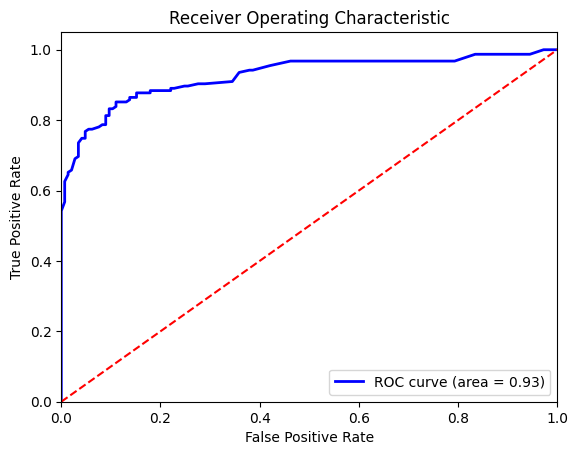

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification

# Sample data and train/test split (use your own data here)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
cls_model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
cls_model.fit(X_train, y_train)

# Predictions
y_pred = cls_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', conf_mat)
print('Classification Report:\n', cls_report)

# ROC Curve
y_probs = cls_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [77]:
import pickle

In [81]:
#serilizing
with open('C:/Capstone files/Industrial_Copper_Modelling/Classification_model.pkl', 'wb') as file:
    pickle.dump(cls_model, file)

In [5]:
import pickle
import numpy as np

In [2]:
#Deserializing(Predict the Status)
with open('C:/Capstone files/Industrial_Copper_Modelling/Classification_model.pkl', 'rb') as file:
    model_2=pickle.load(file)

In [83]:
model_2

RandomForestClassifier(max_depth=20)

In [85]:
X1.sample(2)

,quantity tons,customer,country,item type,application,thickness,width,product_ref,selling_price
65884,1.750635,30201223.0,26.0,5,15.0,1.791759,1980.0,1671863738,6.767343
153693,4.973060,30346534.0,32.0,5,59.0,1.011601,1595.0,640665,6.216606


In [9]:
#Predicting the transaction Status
data=np.array([[1.75, 30346534.0, 32.0, 5, 15.0, 1.791759, 1980.0, 640665, 6.216606]])
status_pred=model_2.predict(data)
if status_pred[0]==7:
    print('Won')
else:
    print('Lose') 

Won


c:\Users\SHOBANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
